In [2]:
import numpy as np
import tqdm 
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl 
import astropy.units as u
from astropy.constants import G, M_sun
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sys

sys.path.append('../pipeline_scripts/')
from pipeline_main import pipeline
from plotting_setup import *

In [3]:
import dispatch as dis
import dispatch.select as dse
import dispatch.graphics as dgr
import dispatch.particles as dpa
from scipy.io import FortranFile as ff

In [4]:
sn = dis.snapshot(337, '', data='/groups/astro/buks/codes/dispatch2-raw/experiments/ISM/data/sink6-l20_omegaff-1/')

14204

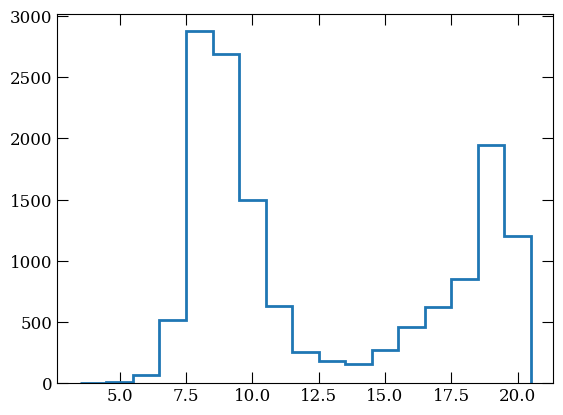

In [5]:
bin_edges = np.arange(3.5, 20 + 1.5, 1)
plt.hist([p.level for p in sn.patches], bins = bin_edges, histtype='step', lw = 2)
len(sn.patches)

In [6]:
def patch_level_evo(snap_i, snap_f, run, lmax = 20, verbose = 1, show_orig=True):
    bin_edges = np.arange(3.5, lmax + 1.5, 1)
    sns = {}
    sns['time'] = np.zeros(snap_f - snap_i + 1)

    for i, io in enumerate(range(snap_i, snap_f + 1)):
        sn = dis.snapshot(io, run)
        sns[io]=sn
        sns['time'][i] = sn.time * sn.scaling.t / sn.cgs.yr
        if verbose !=0: print(io, sns['time'][i])


    sns['time'] = np.array([sns['time'][i] - sns['time'][0] for i in range(len(sns['time']))])

    
    fig, axs = plt.subplots(figsize = (10,6))

    colors = plt.cm.jet(np.linspace(0,1, len(sns['time'])))
    norm = mpl.colors.Normalize(vmin=sns['time'].min(), vmax=sns['time'].max())
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)

    for i, io in enumerate(range(snap_i, snap_f + 1)):
        print(f'Total patches: {len(sns[io].patches)}')
        axs.hist([p.level for p in sns[io].patches], bins = bin_edges, histtype='step', color = colors[i], lw = 2)

    if show_orig:
        sn_fmr = dis.snapshot(223,'sink13fmr05')
        axs.hist([p.level for p in sn_fmr.patches], bins = bin_edges, histtype='step', color = 'black', ls ='--', lw = 2, label = 'fmr05')

    cbar = fig.colorbar(cmap)

    plt.legend(frameon = False)
    axs.set(ylabel = 'Patch count', xlabel = 'Patch level')
    cbar.set_label('Snap time [yr]') 
    axs.set_xticks(np.arange(4,lmax+2,2));


timer:
          patch metadata:   3.364 sec
                    _var:  11.308 sec
            _add_axes(1):   0.229 sec

timer:
          patch metadata:   3.502 sec
                    _var:  14.437 sec
            _add_axes(1):   0.239 sec

timer:
              params.nml:   0.150 sec
          patch metadata:   3.577 sec
          llc-urc-extent:   0.102 sec
                    _var:  17.759 sec
            _add_axes(1):   0.239 sec
Total patches: 2762
Total patches: 2784
Total patches: 3017
Total patches: 6587
Total patches: 6587
Total patches: 6575
Total patches: 6593
Total patches: 6601
Total patches: 6642
Total patches: 6691
Total patches: 6716
Total patches: 6794
Total patches: 6874
Total patches: 6974
Total patches: 7029
Total patches: 7124
Total patches: 7263
Total patches: 7402
Total patches: 7544
Total patches: 7672
Total patches: 7789
Total patches: 7988
Total patches: 8057
Total patches: 8146
Total patches: 8255
Total patches: 8438
Total patches: 8610
Total patches: 870

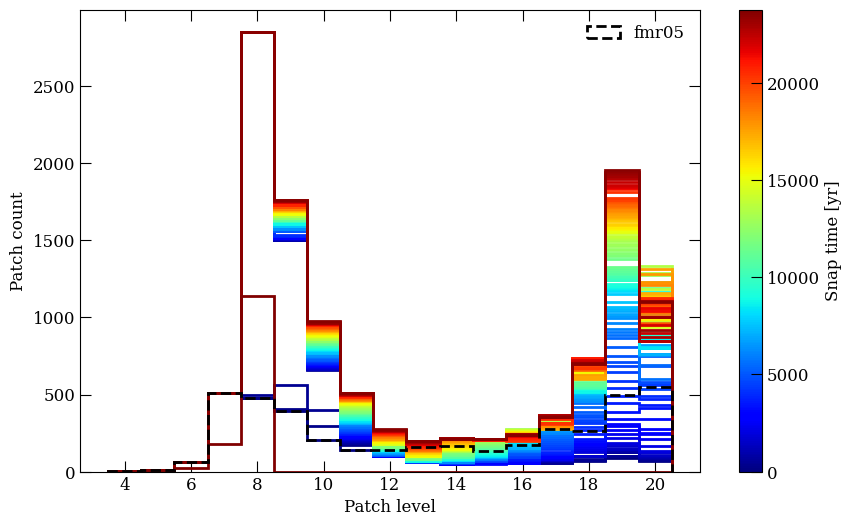

In [7]:
patch_level_evo(223, 342, 's13_omega1', verbose=0)


timer:
          patch metadata:   0.111 sec
                    _var:  42.368 sec
Total patches: 2647
Total patches: 2521
Total patches: 2556
Total patches: 5067
Total patches: 5077
Total patches: 5098
Total patches: 5091
Total patches: 5094
Total patches: 5104
Total patches: 5127
Total patches: 5123
Total patches: 5133
Total patches: 5140
Total patches: 5161
Total patches: 5162
Total patches: 5190
Total patches: 5214
Total patches: 5503
Total patches: 5555
Total patches: 5604
Total patches: 5624
Total patches: 5717
Total patches: 5711
Total patches: 5750
Total patches: 5748
Total patches: 5770
Total patches: 5894
Total patches: 6093
Total patches: 6032
Total patches: 6028
Total patches: 6018
Total patches: 6024
Total patches: 6034
Total patches: 6154
Total patches: 6245
Total patches: 6420
Total patches: 6455
Total patches: 6683
Total patches: 6715
Total patches: 6671
Total patches: 6699
Total patches: 6618
Total patches: 6628
Total patches: 6668
Total patches: 6641
Total patches: 6

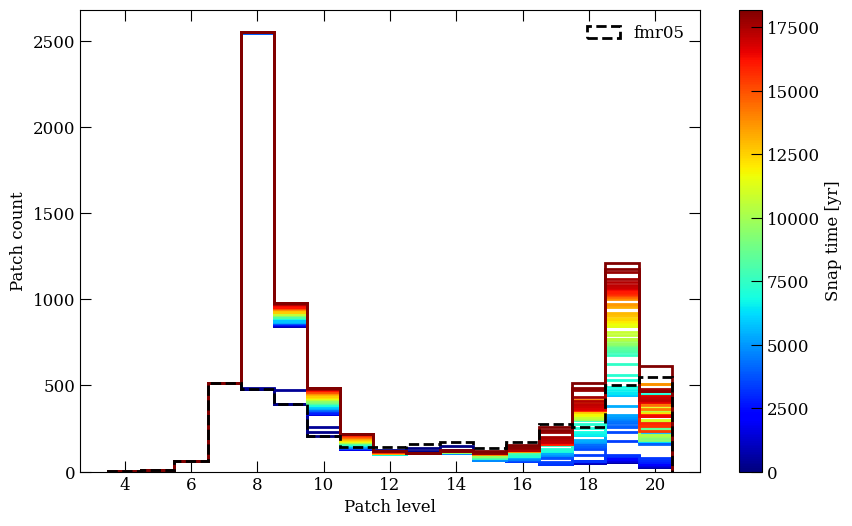

In [8]:
patch_level_evo(223, 314, 's13_09_4', verbose=0)

Total patches: 2577
Total patches: 2583
Total patches: 2641
Total patches: 4469
Total patches: 4469
Total patches: 4469
Total patches: 4469
Total patches: 4492
Total patches: 4503
Total patches: 4512
Total patches: 4508
Total patches: 4526
Total patches: 4527
Total patches: 4564
Total patches: 4589
Total patches: 4588
Total patches: 4580
Total patches: 4572
Total patches: 4592
Total patches: 4609
Total patches: 4671
Total patches: 4708
Total patches: 4722
Total patches: 4781
Total patches: 4781
Total patches: 4953
Total patches: 4956
Total patches: 4966
Total patches: 5025
Total patches: 5045
Total patches: 5055
Total patches: 5031
Total patches: 5071
Total patches: 5138
Total patches: 5132
Total patches: 5126
Total patches: 5146
Total patches: 5149
Total patches: 5171
Total patches: 5166
Total patches: 5212
Total patches: 5237
Total patches: 5242
Total patches: 5189
Total patches: 5186
Total patches: 5179
Total patches: 5175
Total patches: 5200
Total patches: 5304
Total patches: 5344


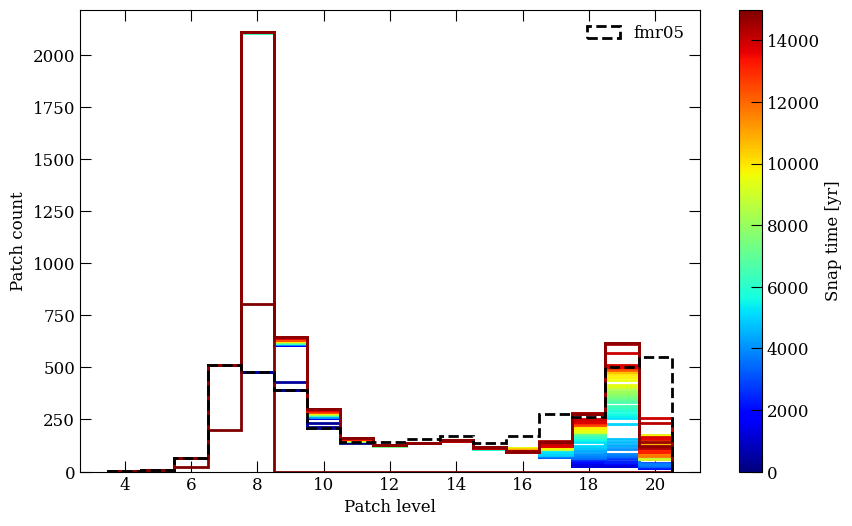

In [8]:
patch_level_evo(223, 298, 's13_09_3', verbose=0)

Total patches: 2647
Total patches: 2521
Total patches: 2556
Total patches: 5067
Total patches: 5077
Total patches: 5098
Total patches: 5091
Total patches: 5094
Total patches: 5104
Total patches: 5127
Total patches: 5123
Total patches: 5133
Total patches: 5140
Total patches: 5161
Total patches: 5162
Total patches: 5190
Total patches: 5214
Total patches: 5503
Total patches: 5555
Total patches: 5604
Total patches: 5624
Total patches: 5717
Total patches: 5711
Total patches: 5750
Total patches: 5748
Total patches: 5770
Total patches: 5894
Total patches: 6093
Total patches: 6032
Total patches: 6028
Total patches: 6018
Total patches: 6024
Total patches: 6034
Total patches: 6154
Total patches: 6245
Total patches: 6420
Total patches: 6455
Total patches: 6683
Total patches: 6715
Total patches: 6671
Total patches: 6699
Total patches: 6618
Total patches: 6628
Total patches: 6668
Total patches: 6641
Total patches: 6700
Total patches: 6680
Total patches: 6606
Total patches: 6652
Total patches: 6712


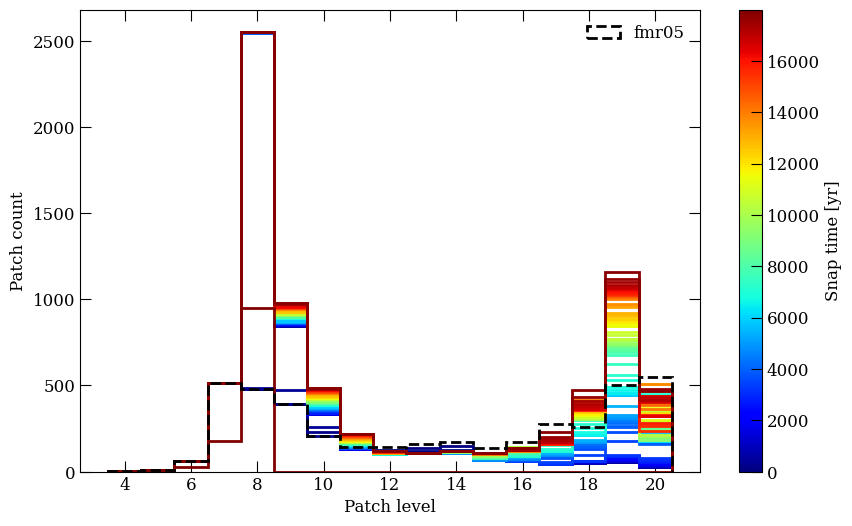

In [9]:
patch_level_evo(223, 313, 's13_09_4', verbose=0)